# Part 3: Machine Learning Models 

# [Loading required packages]

In [1]:
#Loading required packages
import json
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math
import datetime
import seaborn as sb
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
import random

# [Loading and filtering data as per requirement]

In [2]:
#Loading and filtering data 
#This is Green Taxi Trip Data for the year 2018

url = 'https://data.cityofnewyork.us/resource/w7fs-fd9i.json?$where=mta_tax=0&trip_type=1&$limit=18077'
df = pd.read_json(url, orient = 'columns')
df = df.dropna()
#df

#converting date and time format
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])

#calculating the time taken of respctive trips in seconds
df['trip_time'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df['trip_time'] #HH:MM::SS
df['time'] = df['trip_time'].astype('timedelta64[s]')
df['time'] #seconds

df = df[df['fare_amount']>5]
df = df[df['fare_amount']<175]
df = df[df['trip_distance']>10]
df = df[df['trip_distance']<40]
df = df[df['time']<4500]
df = df[df['time']>550]

# [Checking the relationship using scatterplot]

C:\Users\forum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Checking the linearity between fare amount and trip distance')

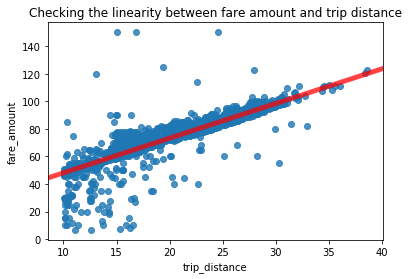

In [3]:
#Checking the relation between trip distance and fare amount by using scatter plot
sb.regplot(x = df["trip_distance"], y = df["fare_amount"], line_kws = {"color":"r","alpha":0.7,"lw":5}).set_title("Checking the linearity between fare amount and trip distance")

#sb.plt.show()
#We can say that these two factors are not perfectly linear 

Text(0.5, 1.0, 'Checking the linearity between fare amount and time taken')

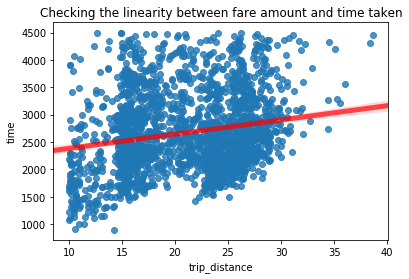

In [4]:
#Checking the relation between trip distance and time by using scatter plot
sb.regplot(x = df["trip_distance"], y = df["time"], line_kws = {"color":"r","alpha":0.7,"lw":5}).set_title("Checking the linearity between fare amount and time taken")

#sb.plt.show()
#There is no relationship between these two factors 

# [Dividing main data into Train and Test data]
# ONE PREDICTOR ONLY

In [5]:
#Dividing data in train and test data
X = df['trip_distance']
Y = df['fare_amount']
x = X.values
y = Y.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
#len(x_train)
#len(y_test)
#We have 1464 train data and 628 test data

#Reshaping the data
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# [Machine learning models]

# Fitting OLS model with one predictor(without constant)


In [6]:
#OLS method without constant also taking only trip distance as predictor

x = df['trip_distance']
y = df['fare_amount']
model = sm.OLS(y_train, x_train).fit()
predictions1 = model.predict(x)
predictions1
RMSE_ols = sqrt(mean_squared_error(df['fare_amount'], predictions1))
RMSE_ols #10.078891008205256

#This model has high R-squared value of 98% which means 98% of variability is explained by this model  
#This model has RMSE of 10.078891008205256 
#model.summary()
#predictions1
#y_test

10.078891008205256


# Fitting OLS model for one predictor(with constant)

In [7]:
#OLS method with constant

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions2 = model.predict(x)
#model.summary()

#RMSE
RMSE_ols1 = sqrt(mean_squared_error(df['fare_amount'], predictions2))
RMSE_ols1

#Checking summary, we can say it is lower R-squared compared to the previous model without constant
#Model without constant is better in fitting
#This model has RMSE value of 8.339010786842922
#For prediction model with constant is better

C:\Users\forum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


8.339010786842922

# Fitting OLS model for two predictor(with constant)

In [8]:
#OLS method for multiple predictors time and trip distance

x = df[['trip_distance', 'time']]
y = df['fare_amount']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions3 = model.predict(x)
#model.summary()

#This has high R-squared value which is 98%. This is even better than the model with single predictor as distance and which did not have constant

#RMSE
RMSE_ols3 = sqrt(mean_squared_error(df['fare_amount'], predictions3))
RMSE_ols3
#This model has RMSE 7.959196282356586

C:\Users\forum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


7.959196282356585

# Linear model using Trip distance as predictor

In [9]:
#Generating linear model with single predictor as trip_dstance
random.seed(12345)
lm = linear_model.LinearRegression()
model = lm.fit(x_train,y_train)

In [10]:
#Checking predictions 
predictions = lm.predict(x_test)
predictions

array([[ 56.2466872 ],
       [ 65.35566453],
       [ 82.99962883],
       [ 55.64774074],
       [ 84.67168769],
       [ 82.87484832],
       [ 90.96062546],
       [ 62.33597615],
       [ 84.89629261],
       [ 63.30926414],
       [ 61.13808324],
       [ 65.58026945],
       [ 88.88926897],
       [ 59.615761  ],
       [ 63.9830789 ],
       [ 88.68962015],
       [ 75.31314933],
       [ 68.62491392],
       [ 84.29734615],
       [ 84.94620481],
       [ 67.15250389],
       [ 92.5079038 ],
       [ 82.75006781],
       [ 83.62353139],
       [ 66.77816236],
       [ 89.03900558],
       [ 60.6639173 ],
       [ 88.68962015],
       [ 84.34725836],
       [ 90.11211798],
       [ 88.78944456],
       [ 48.6101199 ],
       [ 67.05267948],
       [ 78.30788161],
       [ 96.02671422],
       [ 49.95774942],
       [ 83.84813631],
       [ 50.73138859],
       [ 87.09242961],
       [ 91.18523038],
       [ 79.75533554],
       [ 70.04741175],
       [ 61.23790765],
       [ 98

In [11]:
#y_test checking the original values of the predictions made by this model
y_test

array([[ 56.5],
       [ 72. ],
       [ 80.5],
       [ 31.7],
       [ 83.5],
       [ 81.5],
       [ 90. ],
       [ 65. ],
       [ 82. ],
       [ 63. ],
       [ 75.5],
       [ 74.5],
       [ 86.5],
       [ 64. ],
       [ 78.5],
       [ 86.5],
       [ 78.5],
       [ 69.5],
       [ 81.5],
       [ 88. ],
       [ 66. ],
       [ 93. ],
       [ 80. ],
       [ 80.5],
       [ 66.5],
       [ 90. ],
       [ 62.5],
       [ 86.5],
       [ 81.5],
       [ 91. ],
       [ 88. ],
       [ 25. ],
       [ 66.5],
       [ 78. ],
       [ 97. ],
       [ 49.5],
       [ 87. ],
       [ 45. ],
       [ 85. ],
       [ 89.5],
       [114. ],
       [ 71.5],
       [ 61.5],
       [101. ],
       [ 83.5],
       [ 49.5],
       [ 74. ],
       [ 95. ],
       [ 80. ],
       [103. ],
       [ 69.5],
       [ 92.5],
       [ 89. ],
       [ 91. ],
       [ 49. ],
       [ 68.5],
       [ 71.5],
       [ 67.5],
       [ 64. ],
       [ 93.5],
       [ 50. ],
       [ 76. ],
       [

In [12]:
#Checking the R-square of the model
lm.score(x_train,y_train)
#The R-square for our model is 0.7119158073461683

0.7119158073461683

In [13]:
#Coefficiants
lm.coef_
#2.49561023

array([[2.49561023]])

In [14]:
#Intercept
lm.intercept_
#23.4044566

array([23.4044566])

In [15]:
#RMSE
RMSE_lm = sqrt(mean_squared_error(y_test, predictions))
RMSE_lm
#7.701711767076026

7.701711767076026

# Multi-Regression
Using two predictors Trip distance and Time

# [Dividing data in train and test using two predictors such as time and trip distance]

In [16]:
#Multiple regression
P = df[['trip_distance','time']]
Q = df['fare_amount']
p = P.values
q = Q.values

In [17]:
random.seed(12345)
p_train, p_test, q_train, q_test = train_test_split(P, Q, test_size = 0.30, random_state = 42)
#len(p_train) 1464
#len(q_test) 628
p_train = p_train.values
q_train = q_train.values
p_test = p_test.values
q_test = q_test.values

In [18]:
#Developing linear model
random.seed(12345)
lm_multi = linear_model.LinearRegression()
model_multi = lm.fit(p_train,q_train)

In [19]:
#Checking predictions
predictions1 = lm.predict(p_test)
predictions1

array([ 54.7152599 ,  68.65599432,  80.56143303,  54.45990211,
        83.60634233,  82.84952155,  91.21768172,  61.99782878,
        81.95143642,  61.65600131,  66.16274988,  68.8238465 ,
        87.23765401,  63.24721913,  68.86150939,  87.42702793,
        77.25812577,  68.69933121,  82.26973854,  85.47558851,
        65.17821803,  93.84892643,  79.90990283,  80.28885351,
        66.06531743,  91.82369154,  60.83119305,  86.91813608,
        82.27174215,  90.3693934 ,  87.90908507,  46.77841408,
        66.52817157,  78.04761221,  97.24554664,  47.13784664,
        85.84170679,  49.22760145,  85.84548946,  90.15802507,
        77.48270987,  69.46117218,  60.37155833,  99.72132122,
       102.16701933,  48.27863829,  73.10914234,  96.02082921,
        81.31053154, 103.5416917 ,  69.61238759,  92.62220475,
        88.84962936,  92.13028775,  58.44805653,  66.11515953,
        70.76204909,  65.87857736,  63.24400096,  93.7189406 ,
        59.74258454,  76.68054922,  53.58770571,  87.63

In [20]:
#Original data
q_test 

array([ 56.5,  72. ,  80.5,  31.7,  83.5,  81.5,  90. ,  65. ,  82. ,
        63. ,  75.5,  74.5,  86.5,  64. ,  78.5,  86.5,  78.5,  69.5,
        81.5,  88. ,  66. ,  93. ,  80. ,  80.5,  66.5,  90. ,  62.5,
        86.5,  81.5,  91. ,  88. ,  25. ,  66.5,  78. ,  97. ,  49.5,
        87. ,  45. ,  85. ,  89.5, 114. ,  71.5,  61.5, 101. ,  83.5,
        49.5,  74. ,  95. ,  80. , 103. ,  69.5,  92.5,  89. ,  91. ,
        49. ,  68.5,  71.5,  67.5,  64. ,  93.5,  50. ,  76. ,  40. ,
        87.5,  62. ,  76.5,  47.5,  27.7,  89.5,  85. ,  78. ,  28. ,
        32. ,  89. ,  88. ,  28. ,  82. ,  86.5,  80.5,  90. ,  82. ,
        90.5,  71. ,  61. ,  86.5,  61.5,  73.5,  63. ,  73.5,  86. ,
        86. ,  62.5,  88. ,  60.5,  79. ,  61.5,  70. ,  90. ,  69. ,
        74. ,  95. ,  67. ,  78. ,  83.5,  64. ,  84.5,  90.5,  88.5,
        90. ,  65. ,  81. ,  74.5,  86. ,  81.5,  77.5,  90.5,  88. ,
        87. ,  93.5,  64.5,  86. ,  64. ,  82.5,  15. ,  46.5,  69. ,
        87. ,  80. ,

In [21]:
#Checking RMSE value
RMSE_2lm = sqrt(mean_squared_error(q_test, predictions1))
RMSE_2lm

#This model performs better 
#RMSE is 7.08

7.088128480038959

# Choosing best tuning parameter for Ridge and Lasso

In [22]:
#Ridge regression

#Getting data
l = df[['trip_distance','time']]  #predictor
m = df['fare_amount']  #response

#Building model
ridge = Ridge()

#Chosing parameters
parameters = {'alpha' : [1e-15,12-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}

#Using Cross validation to chose best tuning parameter
ridge_regressor = GridSearchCV(ridge,parameters,scoring = 'neg_mean_absolute_error',cv = 5)
ridge_regressor.fit(l,m)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 2, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [23]:
#Printing best parameters
print(ridge_regressor.best_params_)
#20

{'alpha': 20}


In [24]:
#Checking negative mean absolute error
neg_mean_absolute_error_ridge = (ridge_regressor.best_score_)
neg_mean_absolute_error_ridge

-3.236409538121912

In [25]:
#This are the various keys with which we can compare models
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [26]:
#LASSO

#Builting model
lasso = Lasso()

#Choosing tuning parameters
parameters = {'alpha' : [1e-15,12-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}

#Using Cross validation to chose best tuning parameter
lasso_regressor = GridSearchCV(lasso,parameters,scoring = 'neg_mean_absolute_error',cv = 5)
lasso_regressor.fit(l,m)
lasso_regressor.best_params_
#5

C:\Users\forum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\forum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'alpha': 5}

In [27]:
#Checking negative mean absolute error
neg_mean_absolute_error_lasso = (lasso_regressor.best_score_)
neg_mean_absolute_error_lasso
#LASSO performs better
#-3.071018955635664

-3.071018955635664

# Ridge

In [28]:
#Ridge regression
#Same data as multi-linear model
#Using best alpha value selected as above 

#Fitting the model
ridge_model = Ridge(alpha = 20)
ridge_model.fit(p_train,q_train)

#Prediction on test data
predict_ridge = ridge_model.predict(p_test)

In [29]:
#Checking the predictions
predict_ridge

array([ 54.72349957,  68.66286278,  80.55712051,  54.46860535,
        83.6020525 ,  82.84662763,  91.21130825,  62.00400175,
        81.94598422,  61.66099366,  66.17249012,  68.83058183,
        87.23113501,  63.2568578 ,  68.86988666,  87.42081845,
        77.25974755,  68.7029068 ,  82.26507383,  85.4720756 ,
        65.18129946,  93.84246867,  79.90547565,  80.283754  ,
        66.06927962,  91.81961014,  60.83840392,  86.91163924,
        82.26702792,  90.36340192,  87.90304649,  46.78992103,
        66.53211656,  78.046641  ,  97.23743625,  47.14818909,
        85.83951483,  49.23833888,  85.84000762,  90.15082534,
        77.47995094,  69.46373453,  60.37792724,  99.71182324,
       102.15586356,  48.28729518,  73.11315679,  96.01273632,
        81.30778155, 103.52997002,  69.61561776,  92.61928329,
        88.84151358,  92.12412571,  58.45830266,  66.12061861,
        70.76372531,  65.88278863,  63.24756026,  93.70949728,
        59.75424536,  76.67905931,  53.59652421,  87.62

In [30]:
#Checking the actual data
q_test

array([ 56.5,  72. ,  80.5,  31.7,  83.5,  81.5,  90. ,  65. ,  82. ,
        63. ,  75.5,  74.5,  86.5,  64. ,  78.5,  86.5,  78.5,  69.5,
        81.5,  88. ,  66. ,  93. ,  80. ,  80.5,  66.5,  90. ,  62.5,
        86.5,  81.5,  91. ,  88. ,  25. ,  66.5,  78. ,  97. ,  49.5,
        87. ,  45. ,  85. ,  89.5, 114. ,  71.5,  61.5, 101. ,  83.5,
        49.5,  74. ,  95. ,  80. , 103. ,  69.5,  92.5,  89. ,  91. ,
        49. ,  68.5,  71.5,  67.5,  64. ,  93.5,  50. ,  76. ,  40. ,
        87.5,  62. ,  76.5,  47.5,  27.7,  89.5,  85. ,  78. ,  28. ,
        32. ,  89. ,  88. ,  28. ,  82. ,  86.5,  80.5,  90. ,  82. ,
        90.5,  71. ,  61. ,  86.5,  61.5,  73.5,  63. ,  73.5,  86. ,
        86. ,  62.5,  88. ,  60.5,  79. ,  61.5,  70. ,  90. ,  69. ,
        74. ,  95. ,  67. ,  78. ,  83.5,  64. ,  84.5,  90.5,  88.5,
        90. ,  65. ,  81. ,  74.5,  86. ,  81.5,  77.5,  90.5,  88. ,
        87. ,  93.5,  64.5,  86. ,  64. ,  82.5,  15. ,  46.5,  69. ,
        87. ,  80. ,

In [31]:
#RMSE for Ridge
RMSE_ridge = sqrt(mean_squared_error(q_test, predict_ridge))
RMSE_ridge

#7.0883058246486605

7.0883058246486605

# LASSO

In [32]:
#LASSO

lasso_model = Lasso(alpha = 20)
lasso_model.fit(p_train,q_train)

#Prediction on test data
predict_lasso = lasso_model.predict(p_test)

In [33]:
#Checking the predictions
predict_lasso

array([ 59.73572618,  72.7822573 ,  77.97535989,  59.75730788,
        81.0164212 ,  81.09347107,  87.34619541,  65.74866914,
        78.68016642,  64.70717269,  72.00983397,  72.87003869,
        83.30232905,  69.05053589,  73.88325899,  83.67456394,
        78.21746163,  70.86847605,  79.46464276,  83.33674203,
        67.07373254,  89.91238027,  77.25939729,  77.23663983,
        68.47919619,  89.31088124,  65.20547251,  82.99780257,
        79.43720938,  86.72974461,  84.25544271,  53.78571372,
        68.92919469,  77.46150283,  92.30754925,  53.4510694 ,
        84.48578697,  55.76365942,  82.53445261,  85.80154635,
        75.83741496,  71.0238368 ,  64.24809079,  93.94462856,
        95.39122039,  53.58367269,  75.51399755,  91.1002019 ,
        79.64876874,  96.4217647 ,  71.57106012,  90.79417302,
        83.95620393,  88.3792577 ,  64.63967454,  69.41831953,
        71.79070398,  68.44154111,  65.43450567,  88.00888524,
        66.76755387,  75.79397273,  58.95857277,  84.31

In [34]:
#Checking the actual data
q_test

array([ 56.5,  72. ,  80.5,  31.7,  83.5,  81.5,  90. ,  65. ,  82. ,
        63. ,  75.5,  74.5,  86.5,  64. ,  78.5,  86.5,  78.5,  69.5,
        81.5,  88. ,  66. ,  93. ,  80. ,  80.5,  66.5,  90. ,  62.5,
        86.5,  81.5,  91. ,  88. ,  25. ,  66.5,  78. ,  97. ,  49.5,
        87. ,  45. ,  85. ,  89.5, 114. ,  71.5,  61.5, 101. ,  83.5,
        49.5,  74. ,  95. ,  80. , 103. ,  69.5,  92.5,  89. ,  91. ,
        49. ,  68.5,  71.5,  67.5,  64. ,  93.5,  50. ,  76. ,  40. ,
        87.5,  62. ,  76.5,  47.5,  27.7,  89.5,  85. ,  78. ,  28. ,
        32. ,  89. ,  88. ,  28. ,  82. ,  86.5,  80.5,  90. ,  82. ,
        90.5,  71. ,  61. ,  86.5,  61.5,  73.5,  63. ,  73.5,  86. ,
        86. ,  62.5,  88. ,  60.5,  79. ,  61.5,  70. ,  90. ,  69. ,
        74. ,  95. ,  67. ,  78. ,  83.5,  64. ,  84.5,  90.5,  88.5,
        90. ,  65. ,  81. ,  74.5,  86. ,  81.5,  77.5,  90.5,  88. ,
        87. ,  93.5,  64.5,  86. ,  64. ,  82.5,  15. ,  46.5,  69. ,
        87. ,  80. ,

In [35]:
#RMSE for LASSO
RMSE_lasso = sqrt(mean_squared_error(q_test, predict_lasso))
RMSE_lasso

#8.117238413573931

8.117238413573931

# [Comparison of RMSE of respective models by using Bar chart and line chart]

<Figure size 3600x3600 with 0 Axes>

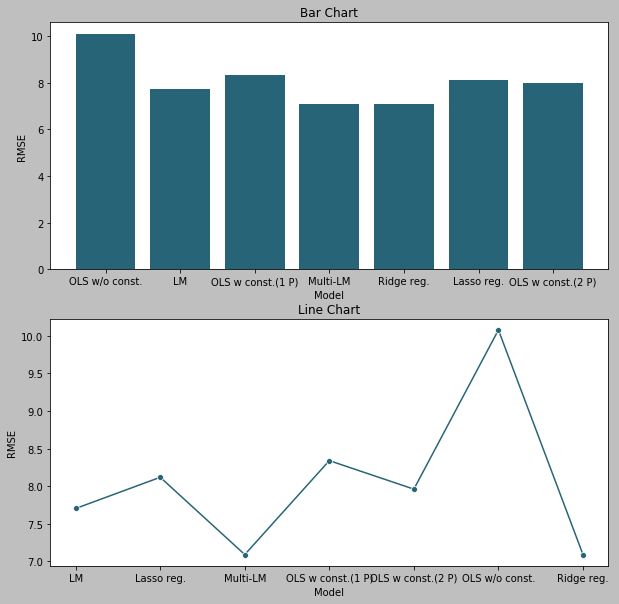

In [36]:
#Comparison of RMSE of respective models by using Bar chart and line chart
#Multi-linear model and Ridge are the best models for this data

RMSE_models = [RMSE_ols, RMSE_lm, RMSE_ols1, RMSE_2lm, RMSE_ridge, RMSE_lasso, RMSE_ols3] 
mod = ['OLS w/o const.', 'LM','OLS w const.(1 P)', 'Multi-LM', 'Ridge reg.', 'Lasso reg.', 'OLS w const.(2 P)']

plt.figure(figsize = (50,50))

with plt.style.context ('grayscale'):
    fig, (ax1 , ax2) = plt. subplots (2, sharey = False, figsize = (10,10) )
    ax2 = sb.lineplot(x = mod, y = RMSE_models, color = '#276478' ,marker = 'o')
    ax1.bar(mod, RMSE_models, align = 'center', alpha = 1, color = '#276478')
    ax1.set(title = 'Bar Chart', xlabel = 'Model', ylabel = 'RMSE')
    ax2.set(title = 'Line Chart', xlabel = 'Model', ylabel ='RMSE')